# Box Plot

박스 하단은 25%, (Q1) <br>
박스 중간 구분선이 전체 데이터의 50%, (Q2) <br>
박스 상단은 75% 를 나타냄 (Q3) <br>

IQR : Inter Quantile Range = Q3 - Q1<br>

Q1과 Q3. 즉 박스를 벗어난 수염이 존재. <br>
수염 == fence.<br>
Q1보다 작은 fence까지의 거리 == Lower Outer Fence == Q1 - 1.5*IQR <br>
Q3보다 큰  fence까지의 거리 == Upper Outer Fence == Q3 + 1.5*IQR<br>

Lower Outer Fence, Upper Outer Fence보다도 밖에 있는 값들을 `이상치`라고 한다.

따라서 Box Plot을 이용하여 `이상치` 발견을 한 후에 제거하는 작업을 주로 사용할 수 있다.


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import seaborn
import scipy as sp

matplotlib.rcParams['font.family'] = 'AppleGothic' # Mac
matplotlib.rcParams['font.size'] = 15 # 글자 크기
matplotlib.rcParams['axes.unicode_minus'] = False # 한글 폰트 사용 시, '-' 마이너스 글자 깨지는 현상 해결

tips = seaborn.load_dataset('tips')
tips.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   total_bill  244 non-null    float64 
 1   tip         244 non-null    float64 
 2   sex         244 non-null    category
 3   smoker      244 non-null    category
 4   day         244 non-null    category
 5   time        244 non-null    category
 6   size        244 non-null    int64   
dtypes: category(4), float64(2), int64(1)
memory usage: 7.4 KB


In [2]:
# 남성 데이터와 관련된 행에서, "tip"을 뽑아옴
tips.loc[tips.sex == "Male", "tip"].describe().round(1) 

count    157.0
mean       3.1
std        1.5
min        1.0
25%        2.0
50%        3.0
75%        3.8
max       10.0
Name: tip, dtype: float64

In [3]:
# 여성 데이터와 관련된 행에서, "tip"을 뽑아옴
tips.loc[tips.sex == "Female", "tip"].describe().round(1) 

count    87.0
mean      2.8
std       1.2
min       1.0
25%       2.0
50%       2.8
75%       3.5
max       6.5
Name: tip, dtype: float64

Text(0, 0.5, 'tip')

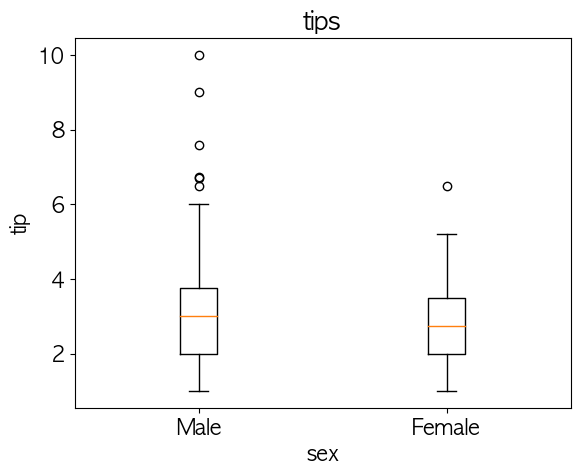

In [5]:
labels = []
tip_list = []

for label, df_per_sex in tips.groupby('sex') :
    labels.append(label)
    tip_list.append(df_per_sex['tip'].tolist())

plt.boxplot(tip_list, labels=labels)
plt.title('tips')
plt.xlabel('sex')
plt.ylabel('tip')

# 이상치(팁을 정상보다 많이 주는)는 남성이 더 많이 보임